In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# conda install conda-forge::pmdarima
from pmdarima import auto_arima

In [26]:
data_frame = pd.read_csv("data/Salestrain.csv")

data_frame = data_frame["data"].values

data_frame.shape

(96,)

In [27]:
model = auto_arima(data_frame, seasonal=True, m=12, trace=False)

In [28]:
print(model.order)

(1, 1, 0)


In [29]:
model = ARIMA(data_frame, order=(1, 1, 0))

model_fit = model.fit()

In [30]:
residuals = model_fit.resid

In [33]:
anomalies = np.where(residuals > 2 * np.std(residuals))[0]

anomalies

array([ 0, 62, 83, 89])

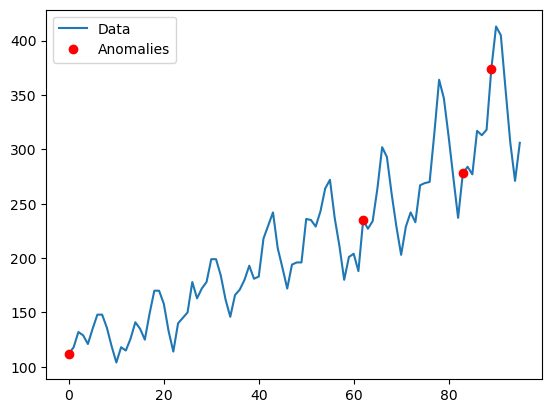

In [34]:
plt.plot(data_frame, label="Data")
plt.plot(anomalies, data_frame[anomalies], "ro", markersize=6, label="Anomalies")
plt.legend()
plt.show()